# Kreditausfallmodellierung mi Hilfe von KI - Wie erklärbar sind denn die Modelle?

### Warum?

- blablabla

#### Globalgalaktische Betrachtung von "Erklärbarkeit":

- Intrinsisch oder „Post hoc“?​ Interpretierbarkeit durch Begrenzung der Komplexität des KI-Modells ​(z.B.  Entscheidungsbäume) oder durch Modellanalysen nach Training?​

- Modellspezifisch oder modellunabhängig?​ Modellspezifische Interpretationswerkzeuge sind auf bestimmte Modellklassen ​beschränkt (z.B. Interpretation von Regressionsgewichten in einem linearen Modell). ​Modellunabhängige Werkzeuge können für jedes maschinelle Lernmodell verwendet werden und werden angewendet, nachdem das Modell trainiert wurde (z.B. Analyse von​ Ein- und Ausgabepaaren von Merkmalen). ​

- Lokal oder global? ​Erklärt die Interpretationsmethode eine einzelne Vorhersage oder das gesamte  Modellverhalten?

### Was?

#### Umfang der Interpretierbarkeit:

- Transparenz des Algorithmus? Wie erstellt der Algorithmus das Modell?​
-- Verständnis dafür, wie der Algorithmus aus Daten lernt und welche Art von Beziehungen  er lernen kann? ​\
-- Methode der kleinsten Quadrate für lineare Modelle: hohe Transparenz, ​\
-- Deep Learning: weniger Transparenz​

- Globale, ganzheitliche Modellinterpretierbarkeit. Wie trifft das trainierte Modell Vorhersagen?​
-- Verständnis dafür, wie das Modell Entscheidungen trifft, und zwar auf der Grundlage einer ganzheitlichen Betrachtung seiner Merkmale und der einzelnen gelernten Komponenten wie Gewichte, Parameter und Strukturen. ​\
-- Welche Merkmale sind wichtig und welche Art von Interaktion findet zwischen ihnen statt? ​

- Globale Modellinterpretierbarkeit auf modularer Ebene. Wie wirken sich Teile des Modells auf die Vorhersagen aus?​
-- Verständnis dafür, wie Modelle auf modularer Ebene funktionieren. ​\
-- z.B. können bei linearen Modellen die Gewichte gut interpretiert werden, während bei Bäumen die Splits (ausgewählte Merkmale plus Abschneidepunkte) und die Blattknotenvorhersagen gut interpretierbar sind​

- Lokale Interpretierbarkeit für eine einzelne Vorhersage. Warum hat das Modell eine bestimmte Vorhersage für eine Instanz getroffen?​
-- Verständnis dafür, was das Modell für eine einzelne Instanz oder Eingabe vorhersagt und erklären warum. ​

- Lokale Interpretierbarkeit für eine Gruppe von Vorhersagen. Warum hat das Modell bestimmte Vorhersagen für eine Gruppe von Instanzen gemacht?
-- Verständnis dafür, wie Modellvorhersagen für eine Gruppe von Instanzen getroffen werden. ​


#### Eigenschaften der Interpretierbarkeit:

- Genauigkeit und Zuverlässigkeit: Wie gut sagt eine Erklärung des Modells ungesehene Daten voraus und wie gut kann durch die Erklärung die Vorhersage des Black-Box Modells approximiert werden? ​

- Konsistenz: Inwieweit unterscheidet sich eine Erklärung zwischen Modellen, die für dieselbe Aufgabe trainiert wurden und die ähnliche Vorhersagen liefern?​

- Stabilität: Wie ähnlich sind die Erklärungen für ähnliche Instanzen? Während die Konsistenz Erklärungen zwischen Modellen vergleicht, vergleicht die Stabilität Erklärungen zwischen ähnlichen Instanzen für ein festes Modell.​

- ​Verständlichkeit: Wie gut verstehen Menschen die Erklärungen?​

- Gewissheit: Spiegelt die Erklärung die Gewissheit des maschinellen Lernmodells wider? Viele Modelle des maschinellen Lernens geben nur Vorhersagen, ohne eine Aussage über die Sicherheit des Modells, dass die Vorhersage richtig ist.​

- Grad der Wichtigkeit: Wie gut spiegelt die Erklärung die Bedeutung von Merkmalen oder Teilen der Erklärung wider?​

- Neuheit: Spiegelt die Erklärung wider, ob eine zu erklärende Dateninstanz aus einer "neuen" Region stammt, die weit von der Verteilung der Trainingsdaten entfernt ist? In solchen Fällen kann das Modell ungenau und die Erklärung nutzlos sein.​

- Repräsentativität: Wie viele Instanzen deckt eine Erklärung ab? Erklärungen können das gesamte Modell abdecken (z. B. die Interpretation von Gewichten in einem linearen Regressionsmodell) oder nur eine einzelne Vorhersage darstellen (z. B. Shapley-Werte).​

### Wie?

- Verwende "interpretierbare" Modelle

-- z.B. Decision Trees oder Decision Rule (zB Ripper Algorithmus oder Bayesian Rule Lists/Scalable Bayesian Rule Lists​) für Credit Default: \
-> Klassifizierungsproblem \
-> Zusammenhang zwischen Features und Outcome nicht linear \
-> Monotonie in Beziehung Feature und Outcome (erleichtert Verständnis) \
-> Berücksichtige WW zwischen Features \


-- Vorteile Decision Tree: \
gut erklärbar/leicht interpretierbar (solange Baum kurz ist) und visualisierbar; ideal um WW zwischen Features zu modellieren,  muss Features als Input nicht unbedingt transformieren

-- Nachteile Decision Tree: \
nicht in der Lage lineare Zusammenhänge abzubilden (approx. über Stufenfunktion); Geringfügige Änderungen des Eingangsmerkmals können große Auswirkungen auf das vorhergesagte Ergebnis haben; instabil, Einige wenige Änderungen im Trainingsdatensatz können einen völlig anderen Baum erzeugen. 


-- Vorteile Decision Rule: \
einfach interpretierbar, kompakter als Entscheidungsbäume; schnell (binär), robust gegenüber monotonen Transformationen der Eingangsmerkmale, da sich nur der Schwellenwert in den Bedingungen ändert. Sie sind auch robust gegenüber Ausreißern, da es nur darauf ankommt, ob eine Bedingung zutrifft oder nicht. Fokussieren sich auf relevanten Merkmale.

-- Nachteile Decision Rule: \
Fokus auf Klassifizierung, Features müssen Kategorisiert werden, Anfällig für Overfitting, schlecht geeignet, um lineare Beziehungen zwischen Merkmalen und Output zu beschreiben



# German Credit Dataset

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import set_config
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.base import clone
from sklearn.preprocessing import FunctionTransformer, StandardScaler, PowerTransformer, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.ensemble import HistGradientBoostingClassifier, GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import squareform
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, roc_curve, confusion_matrix, log_loss
import warnings

import warnings
warnings.filterwarnings("ignore")
pd.pandas.set_option('display.max_columns',None)
plt.style.use('ggplot')

In [8]:
df = pd.read_csv('german_credit_data.csv')
df

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad
...,...,...,...,...,...,...,...,...,...,...,...
995,995,31,female,1,own,little,NaN,1736,12,furniture/equipment,good
996,996,40,male,3,own,little,little,3857,30,car,good
997,997,38,male,2,own,little,NaN,804,12,radio/TV,good
998,998,23,male,2,free,little,little,1845,45,radio/TV,bad


In [9]:
def missing_value_table(df):
    missing_value = df.isna().sum().sort_values(ascending=False)
    missing_value_percent = 100 * df.isna().sum()//len(df)
    missing_value_table = pd.concat([missing_value, missing_value_percent], axis=1)
    missing_value_table_return = missing_value_table.rename(columns = {0 : 'Missing Values', 1 : '% Value'})
    cm = sns.light_palette("lightgreen", as_cmap=True)
    missing_value_table_return = missing_value_table_return.style.background_gradient(cmap=cm)
    return missing_value_table_return
  
missing_value_table(df)

,Missing Values,% Value
Checking account,394,39
Saving accounts,183,18
Unnamed: 0,0,0
Age,0,0
Sex,0,0
Job,0,0
Housing,0,0
Credit amount,0,0
Duration,0,0
Purpose,0,0


In [10]:
# remove NA
df = df.fillna('unknown')
df=df.drop(["Unnamed: 0"],axis=1)

In [11]:
# Convert object types to category
object_cols = df.select_dtypes(include=['object']).columns
df[object_cols] = df[object_cols].astype('category')
df['Job'] = df['Job'].astype('category')

In [12]:
# Create helper array with numerical and categorical column names
num_features = df._get_numeric_data().columns.tolist()
cat_features = df.drop(num_features, axis=1).columns.tolist()
print(f'Numerical columns: {num_features}')
print(f'Categorical columns: {cat_features}')

Numerical columns: ['Age', 'Credit amount', 'Duration']
Categorical columns: ['Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account', 'Purpose', 'Risk']


In [13]:
data =df
data

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,unknown,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,unknown,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad
...,...,...,...,...,...,...,...,...,...,...
995,31,female,1,own,little,unknown,1736,12,furniture/equipment,good
996,40,male,3,own,little,little,3857,30,car,good
997,38,male,2,own,little,unknown,804,12,radio/TV,good
998,23,male,2,free,little,little,1845,45,radio/TV,bad


# RIVAPY Credit Default Dataset

In [14]:
from enum import IntEnum
import numpy as np
import scipy
from scipy import stats
import pandas as pd

class Features(IntEnum):
    Age = 0
    Income = 1
    Savings = 2
    Credit_income_ratio = 3
    Economimc_factor = 4
    ZIP_code = 5


class CreditDefaultData2:
        
    @staticmethod
    def sample(n_years: int, n_data_per_year: int, seed: int=None,
                cov:np.ndarray=None, 
                include_economic_factor: bool=True)->pd.DataFrame: 
        """Sample credit default data. 

        Return a pandas DataFrame that contains some credit features together with the default probability
        and an indicator if the default occured (1) or if the credit did not default (0). The data is generated by a logistic regression
        where the pd for a credit is computed by logistic regression (with fixed coefficients). The following features
        are used

        - :math:`x_{\\mbox{age}}` age of lender, sampled from beta distribution (a=2, b=5)
        - :math:`x_{\\mbox{income}}` income of lender, sampled from beta distribution (a=2.0, b=2.0)
        - :math:`x_{\\mbox{savings}}` savings of lender, sampled from beta distribution (a=5.0, b=1.0)
        - :math:`x_{\\mbox{amount}}` amount of credit, sampled from  beta distribution (a=0.5, b=0.5)
        - :math:`x_{\\mbox{economic}}` economic factor, uniformly sampled from [0,0.5] for each year but one of the samples will be set to 1.0

        The single features are related via a Gaussian copula. The following figure shows the distributions and pairplots for a 
        generated sample of features.

        .. image:: ../../../docs/source/figs/credit_default_features.png
            :align: center
            :width: 400
  
        After the features have been generated, logistic regression is used to compute default probabilities (pd) via the formula
        
        .. math::
            pd = \\frac{1}{1+e^{x_{\\mbox{age}}}

        Args:
            n_data (int): Number of data sampled (number of rows of final DataFrame).
            seed (int, optional): The seed used internally, if None, no seed will be set. Defaults to None.
            constant (float, optional): Constant used in logistic regression that determines the overall level of the pd. Defaults to -1.0.
            cov (np.ndarray, optional): Covariance matrix used in the Gaussian copula. Defaults to None (thena flat covariance of 0.95 is used).

        Returns:
            pd.DataFrame: DataFrame with features, default probabilities and default indicator.
        """
        if seed is not None:
            np.random.seed(seed)
        if cov is None:
            cov = np.array([[1.0,0.95,0.95,0.95],
                [0.95,1.0,0.95,0.95],
                [0.95,0.95,1.0,0.95],
                [0.95,0.95,0.95,1.0],])
        mean = np.array([0.0,0.0,0.0,0.0])
        if include_economic_factor:
            economic_score = np.random.uniform(0, 0.5, size=n_years)
            economic_score[-1] = 1.0
        if include_economic_factor:
            x = pd.DataFrame(np.empty((n_years*n_data_per_year, 5)), 
                            columns=['age','income','savings','credit_income_ratio' , 'economic_factor'])
        else:
            x = pd.DataFrame(np.empty((n_years*n_data_per_year, 4)), 
                            columns=['age','income','savings','credit_income_ratio'])
        
        for y in range(n_years):
            start = y*n_data_per_year
            end = start + n_data_per_year
            if include_economic_factor:
                x['economic_factor'][start:end] = economic_score[y]
            x_ = np.random.multivariate_normal(mean=mean, cov=cov, size=n_data_per_year)
            x_ = pd.DataFrame(x_, 
                          columns=['age','income','savings','credit_income_ratio',])
            beta_params={'age': {'a': 2.0,'b': 5.0}, 
                        'income':{'a':2.0, 'b': 2.0}, 
                        'savings':{'a':5.0,'b':1.0}, 
                        'credit_income_ratio':{'a':0.5,'b': 0.5}}
            for c in beta_params.keys():
                x[c][start:end] = scipy.stats.beta.ppf(scipy.stats.norm.cdf(x_[c].values), **beta_params[c])
        df = pd.DataFrame(x)
        
        default_prob = CreditDefaultData2._predict(df.values)
        df['default_prob'] = default_prob
        tmp = np.random.uniform(low=0.0,high=1.0, size=n_years*n_data_per_year)
        defaulted = np.zeros((n_years*n_data_per_year,))
        defaulted[tmp<default_prob] = 1.0
        df['defaulted'] = defaulted
        return df
    
    
    @staticmethod
    def _predict(X: np.ndarray)->np.ndarray:
        """This method computes the pd and is called by the method sample.

        Args:
            df (np.ndarray): 

        Returns:
            np.ndarray: Vector of default probabilities.
        """
        
        age = X[:,Features.Age]
        age = 5.0*(1.0-age)*age
        credit_income_ratio = -5.0*0.3*X[:, Features.Credit_income_ratio]
        x1 = 1.5*(X[:, Features.Income])**2
        x2 = 1.5*X[:, Features.Savings]
        if X.shape[1] == 5: # if the given data does not contain the economic factor, set it to 1.0
            x3 = 1.0-X[:, Features.Economimc_factor]
        else:
            x3 = 0.0
        return 1.0/(1.0+np.exp(2.0*(age+credit_income_ratio + x1+x2+x3)))
    


In [37]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Use RiVaPy repo from https://github.com/RIVACON/RiVaPy

import shap
from corr_shap import CorrExplainer

# generate credit default dataset with high correlation between savings and income
cred = CreditDefaultData2()
#cov = np.array([[1.0, 0., 0., 0.],
#                [0., 1.0, 0.95, 0.],
#                [0., 0.95, 1.0, 0.],
#                [0., 0., 0., 1.0], ])
data = cred.sample(5, 1000)#, cov=cov)
data2 = data.drop(columns=['default_prob', 'defaulted'])
feature_names = ['age', 'income', 'savings', 'credit_income_ratio', 'economic_factor']

training_data, test_data = train_test_split(data2, test_size=0.2, random_state=0)
x_train = pd.DataFrame(training_data, columns=feature_names)
x_test = pd.DataFrame(test_data, columns=feature_names)

In [38]:
data

,age,income,savings,credit_income_ratio,economic_factor,default_prob,defaulted
0,0.366697,0.544234,0.906015,0.540499,0.345005,0.003621,0.0
1,0.174167,0.388433,0.820428,0.164775,0.345005,0.005664,0.0
2,0.381033,0.540304,0.901765,0.830346,0.345005,0.008505,0.0
3,0.253377,0.529839,0.913367,0.355315,0.345005,0.003275,0.0
4,0.163491,0.286864,0.808516,0.200726,0.345005,0.008596,0.0
...,...,...,...,...,...,...,...
4995,0.081497,0.119083,0.600032,0.010533,1.000000,0.071785,0.0
4996,0.321689,0.658347,0.957965,0.824913,1.000000,0.020204,0.0
4997,0.184094,0.430976,0.728097,0.125150,1.000000,0.020470,0.0
4998,0.238929,0.327258,0.793989,0.238607,1.000000,0.021756,0.0


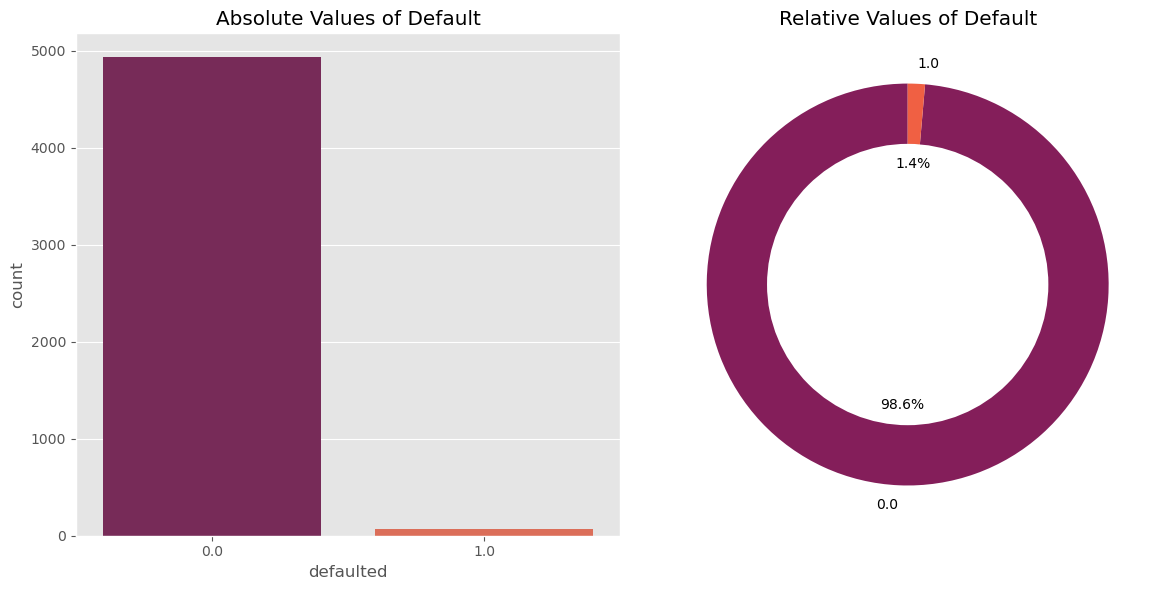

In [39]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.countplot(x='defaulted', data=data, ax=ax[0], palette='rocket')
ax[0].set_title('Absolute Values of Default')
colors = sns.color_palette('rocket', n_colors=data['defaulted'].nunique())
risk_counts = data['defaulted'].value_counts()
ax[1].pie(risk_counts, labels=risk_counts.index, autopct='%1.1f%%', startangle=90, colors=colors)
ax[1].add_artist(plt.Circle((0,0),0.70,fc='white'))
ax[1].set_title('Relative Values of Default')
plt.tight_layout()
plt.show();

- unausgewogener Datensatz (Klassifizierung); schiefe Verteilung/Ungleichgewicht der bekannten Klassen
- Herausforderung für Vorhersage/Modellierung, meiste KI-Algorithmen treffen Annahme, einer ausgewogenen Verteilung
- führt zu Modellen mit schlechterer Vorhersageleistung (insb. für Klasse mit Minderheiten): Problem, da Minderheiten i.d.R. wichtiger sind

- Lösung: Methoden des Over- oder Undersamplings, um Methoden gleichmäßier zu gestalten (z.B. https://medium.com/@daniele.santiago/balancing-imbalanced-data-undersampling-and-oversampling-techniques-in-python-7c5378282290)

In [40]:
features = data.columns.tolist()
features

['age',
 'income',
 'savings',
 'credit_income_ratio',
 'economic_factor',
 'default_prob',
 'defaulted']

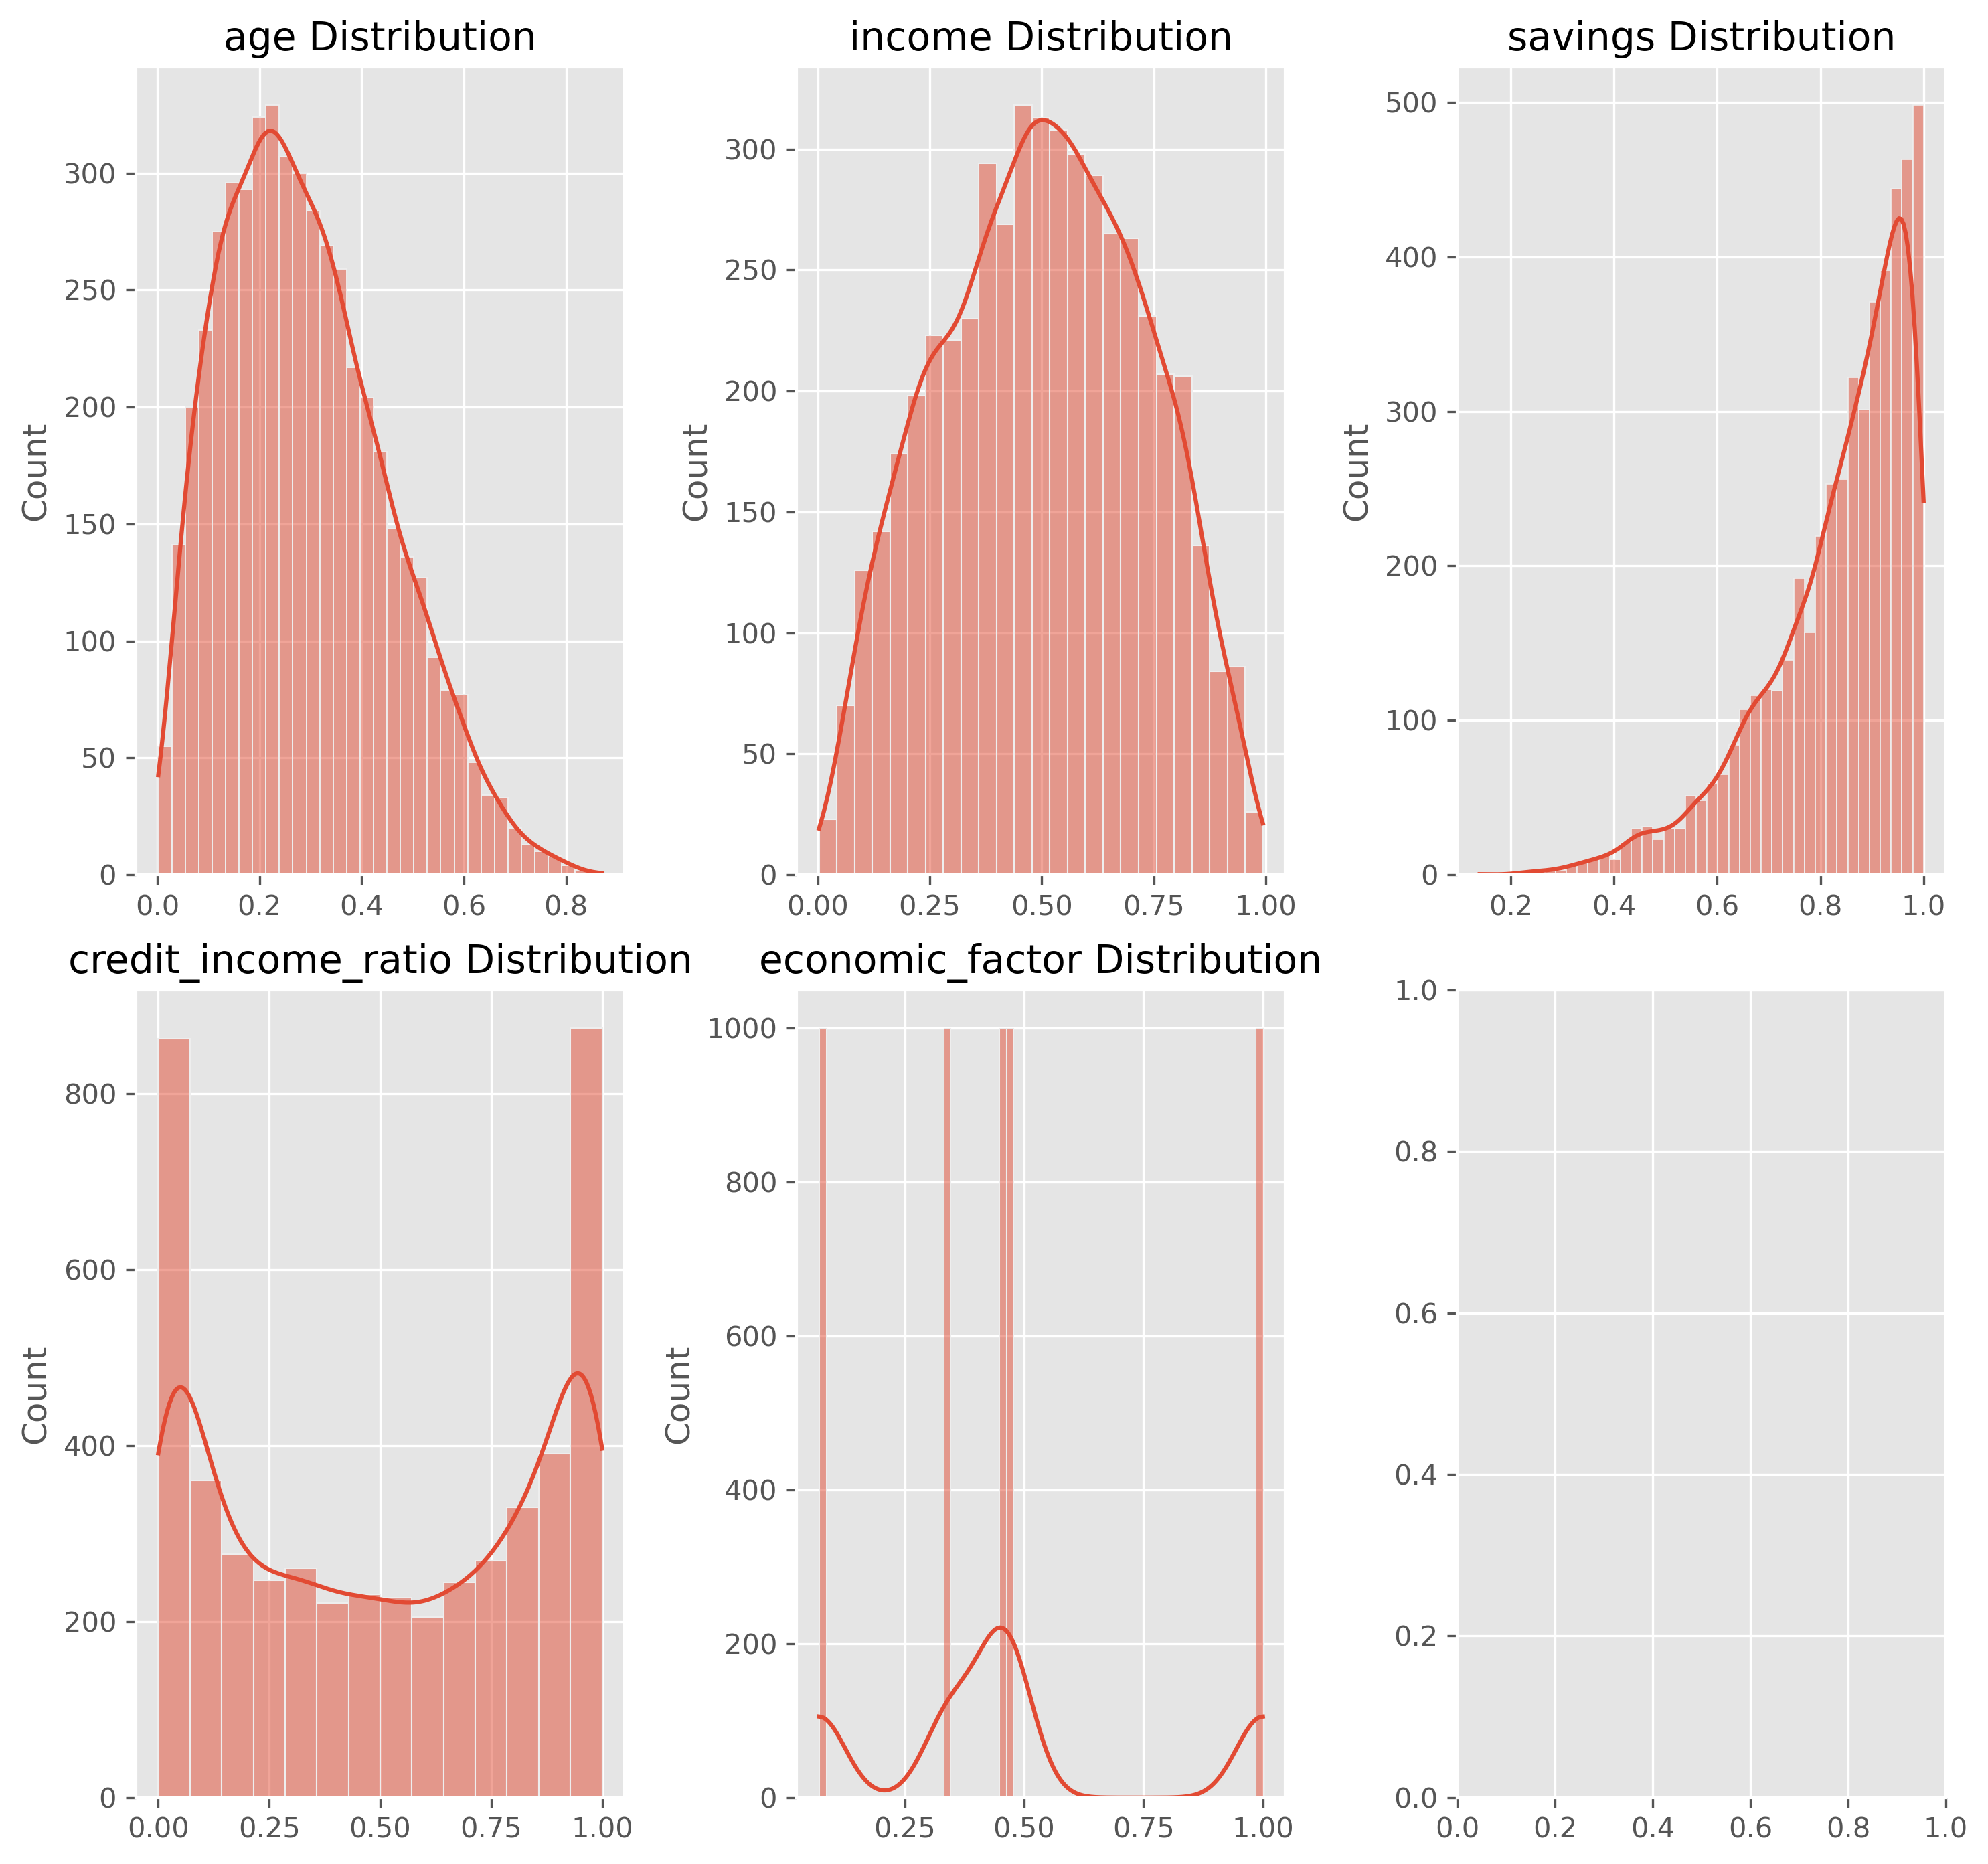

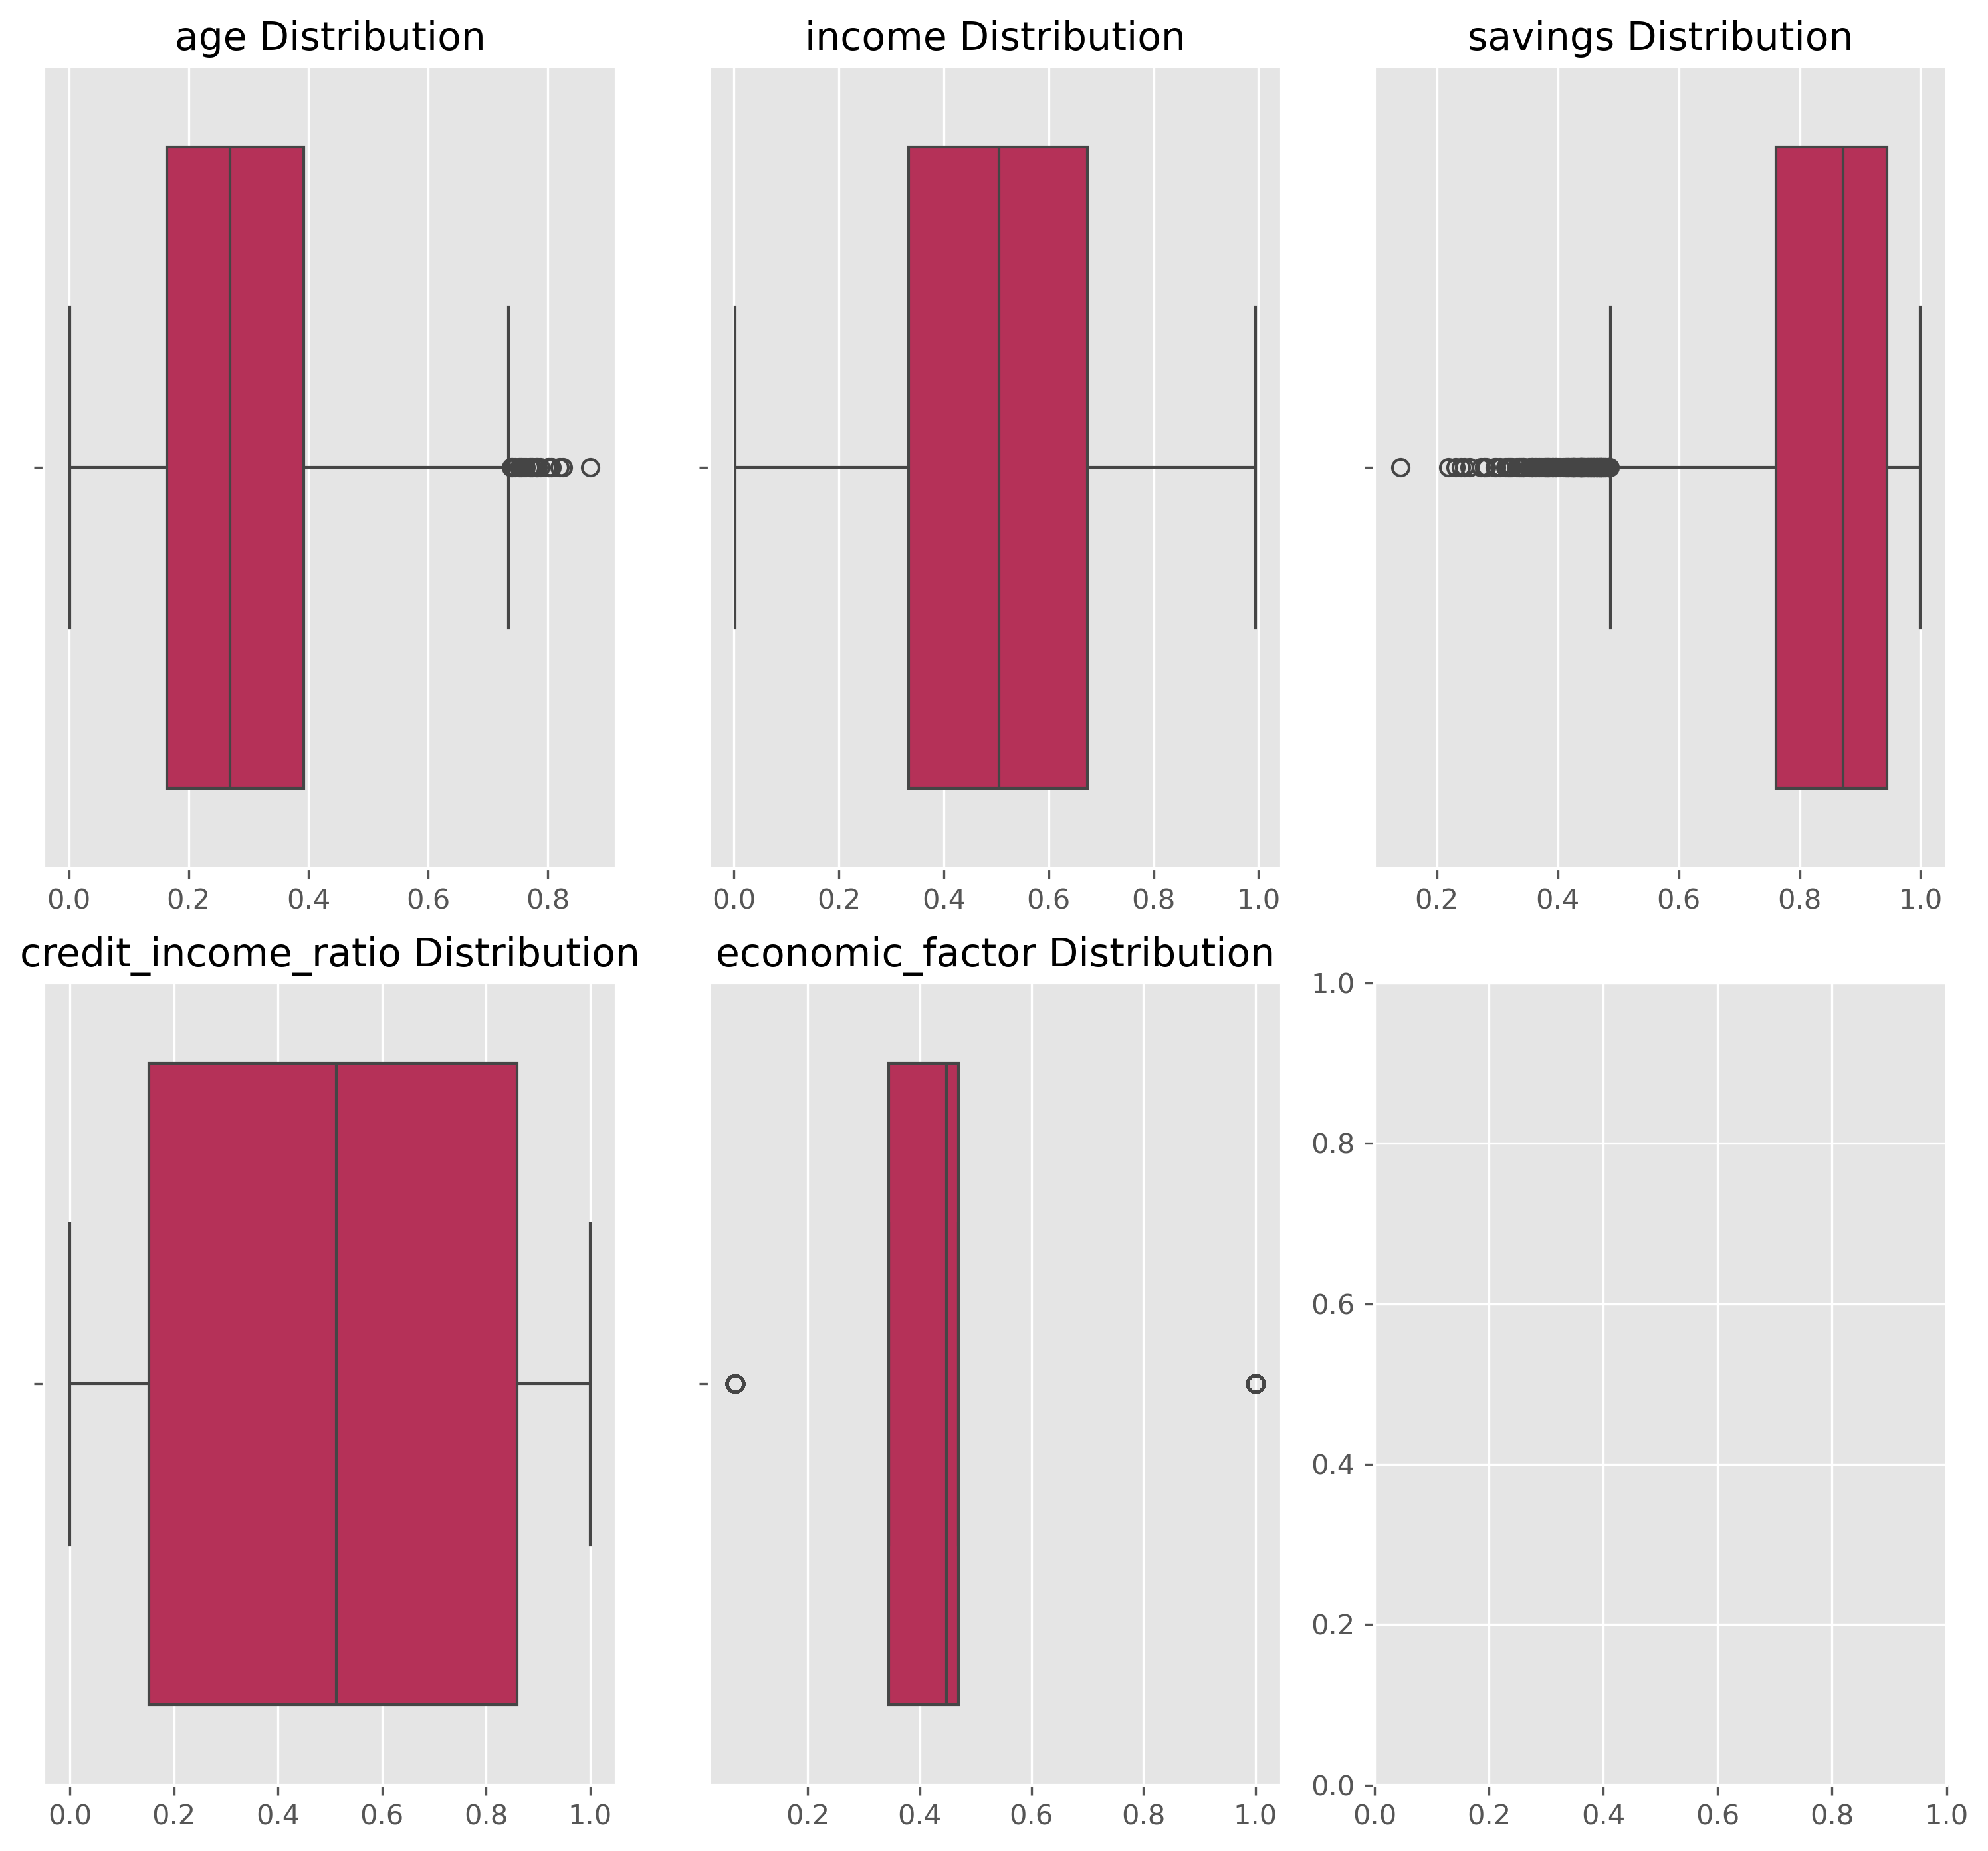

In [41]:
fig, ax = plt.subplots(2, 3, figsize = (10, 10), dpi=300)
ax = ax.flatten()
for idx,column in enumerate(features[:-2]):
    sns.histplot(data=data, x=column, ax=ax[idx], palette='rocket', kde=True)
    ax[idx].set_title(f'{column} Distribution', size = 14)
    ax[idx].set_xlabel(None)
    plt.tight_layout()
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show();


fig, ax = plt.subplots(2, 3, figsize = (10, 10), dpi=300)
ax = ax.flatten()
for idx,column in enumerate(features[:-2]):
    sns.boxplot(data=data, x=column, ax=ax[idx], palette='rocket')
    ax[idx].set_title(f'{column} Distribution', size = 14)
    ax[idx].set_xlabel(None)
    plt.tight_layout()
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show();

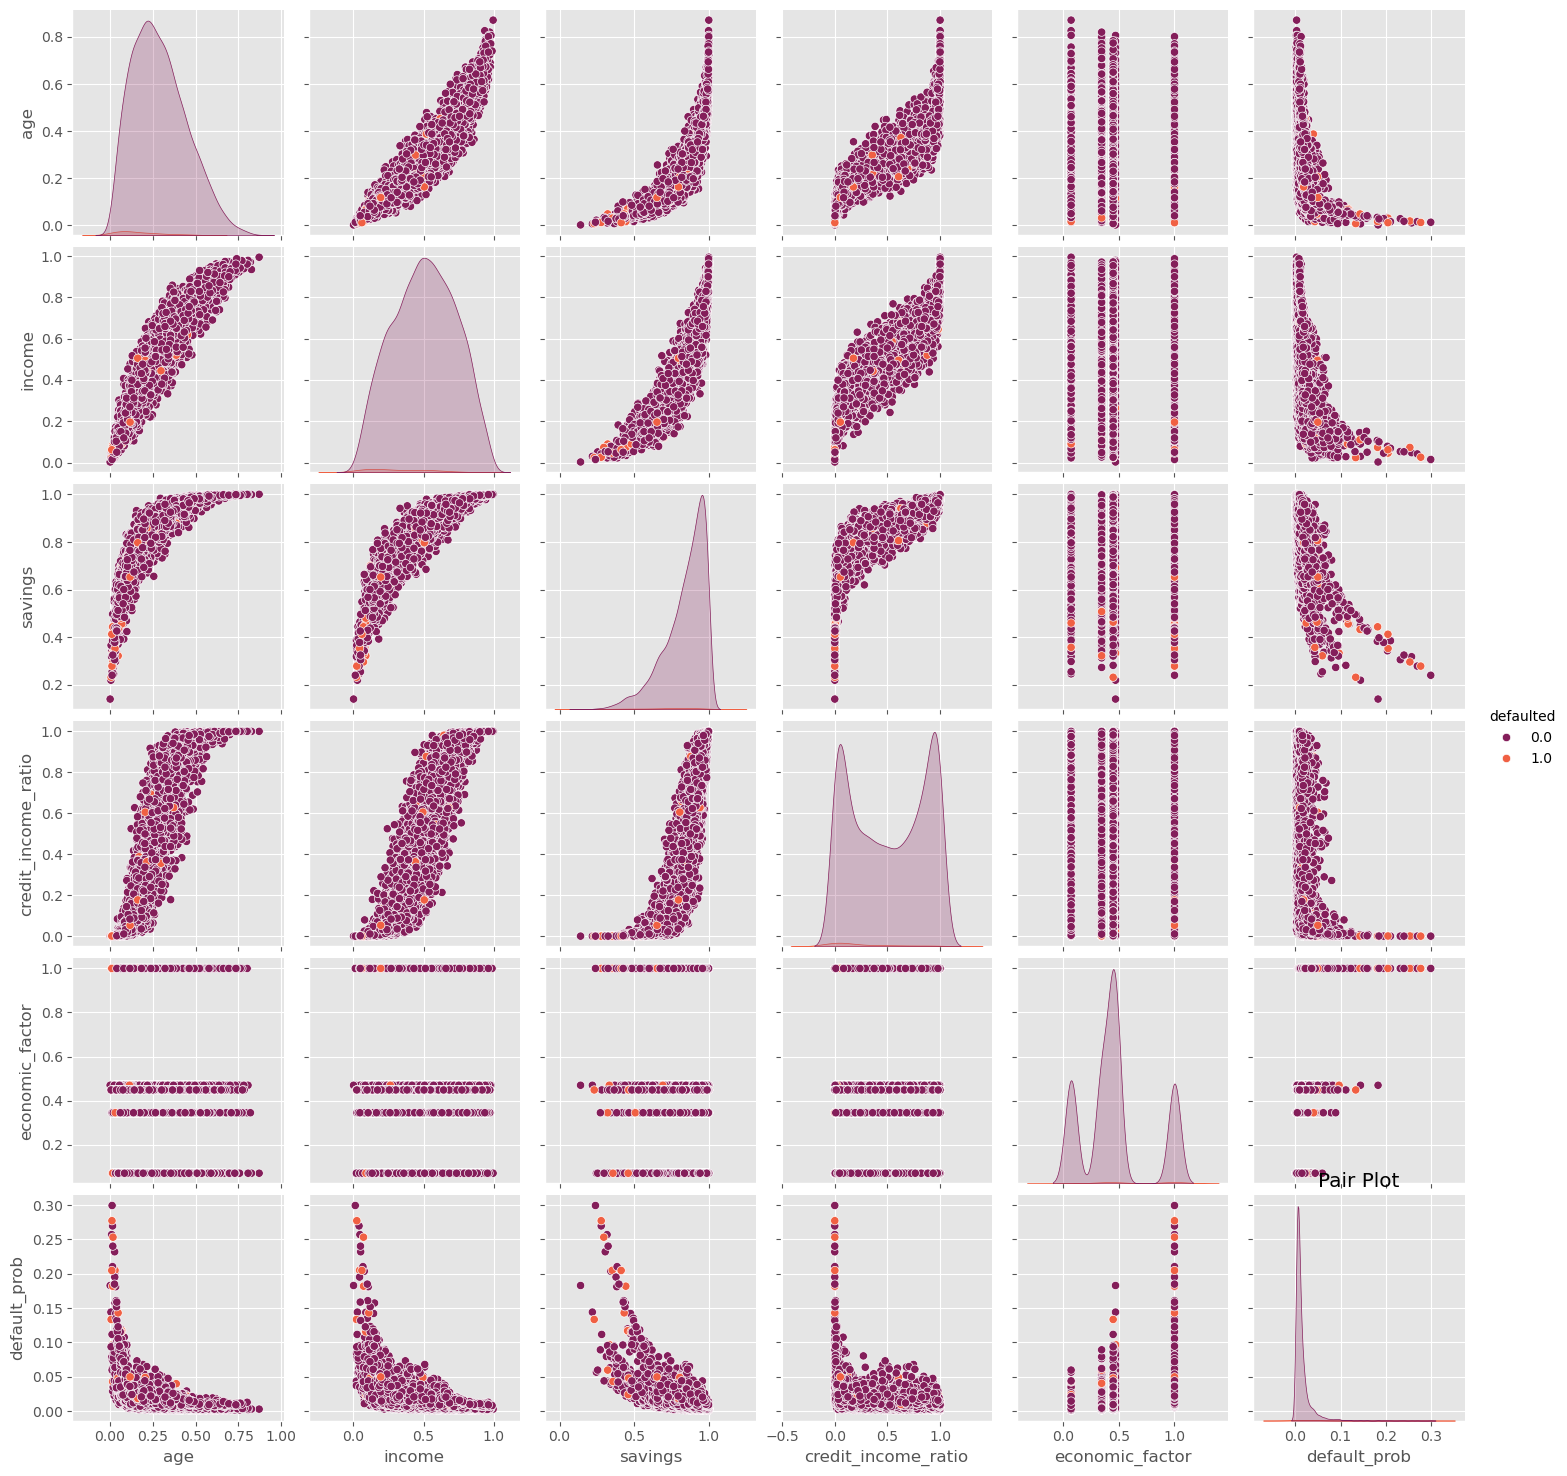

In [42]:
plt.style.use('ggplot')
sns.pairplot(data, hue='defaulted', palette='rocket')
plt.title('Pair Plot')
plt.show();

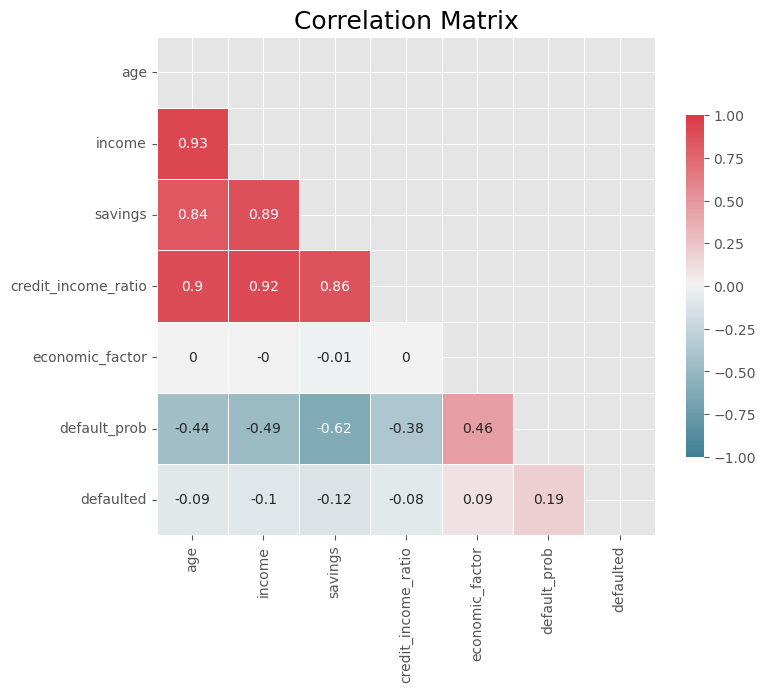

In [43]:
corr = data[features].corr().round(2)
mask = np.zeros_like(corr, dtype=np.bool_)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(8, 8))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
plt.title('Correlation Matrix', fontsize=18)
plt.tight_layout()

# German Credit Data Analysis

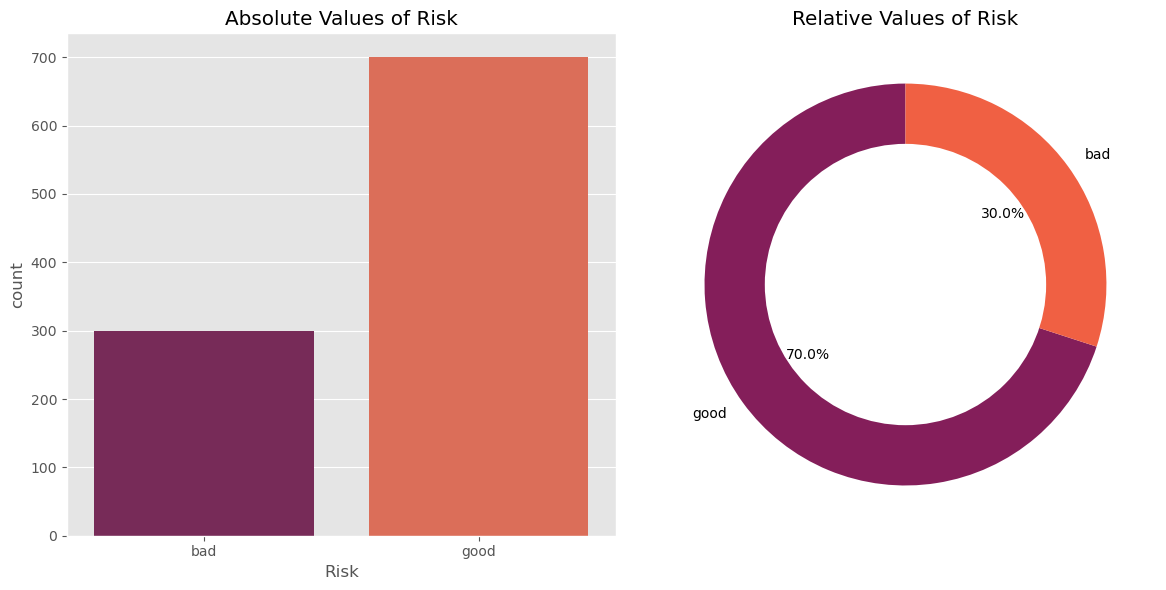

In [15]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.countplot(x='Risk', data=data, ax=ax[0], palette='rocket')
ax[0].set_title('Absolute Values of Risk')
colors = sns.color_palette('rocket', n_colors=data['Risk'].nunique())
risk_counts = data['Risk'].value_counts()
ax[1].pie(risk_counts, labels=risk_counts.index, autopct='%1.1f%%', startangle=90, colors=colors)
ax[1].add_artist(plt.Circle((0,0),0.70,fc='white'))
ax[1].set_title('Relative Values of Risk')
plt.tight_layout()
plt.show();

- unausgewogener Datensatz (Klassifizierung); schiefe Verteilung/Ungleichgewicht der bekannten Klassen
- Herausforderung für Vorhersage/Modellierung, meiste KI-Algorithmen treffen Annahme, einer ausgewogenen Verteilung
- führt zu Modellen mit schlechterer Vorhersageleistung (insb. für Klasse mit Minderheiten): Problem, da Minderheiten i.d.R. wichtiger sind

- Lösung: Methoden des Over- oder Undersamplings, um Methoden gleichmäßier zu gestalten (z.B. https://medium.com/@daniele.santiago/balancing-imbalanced-data-undersampling-and-oversampling-techniques-in-python-7c5378282290)

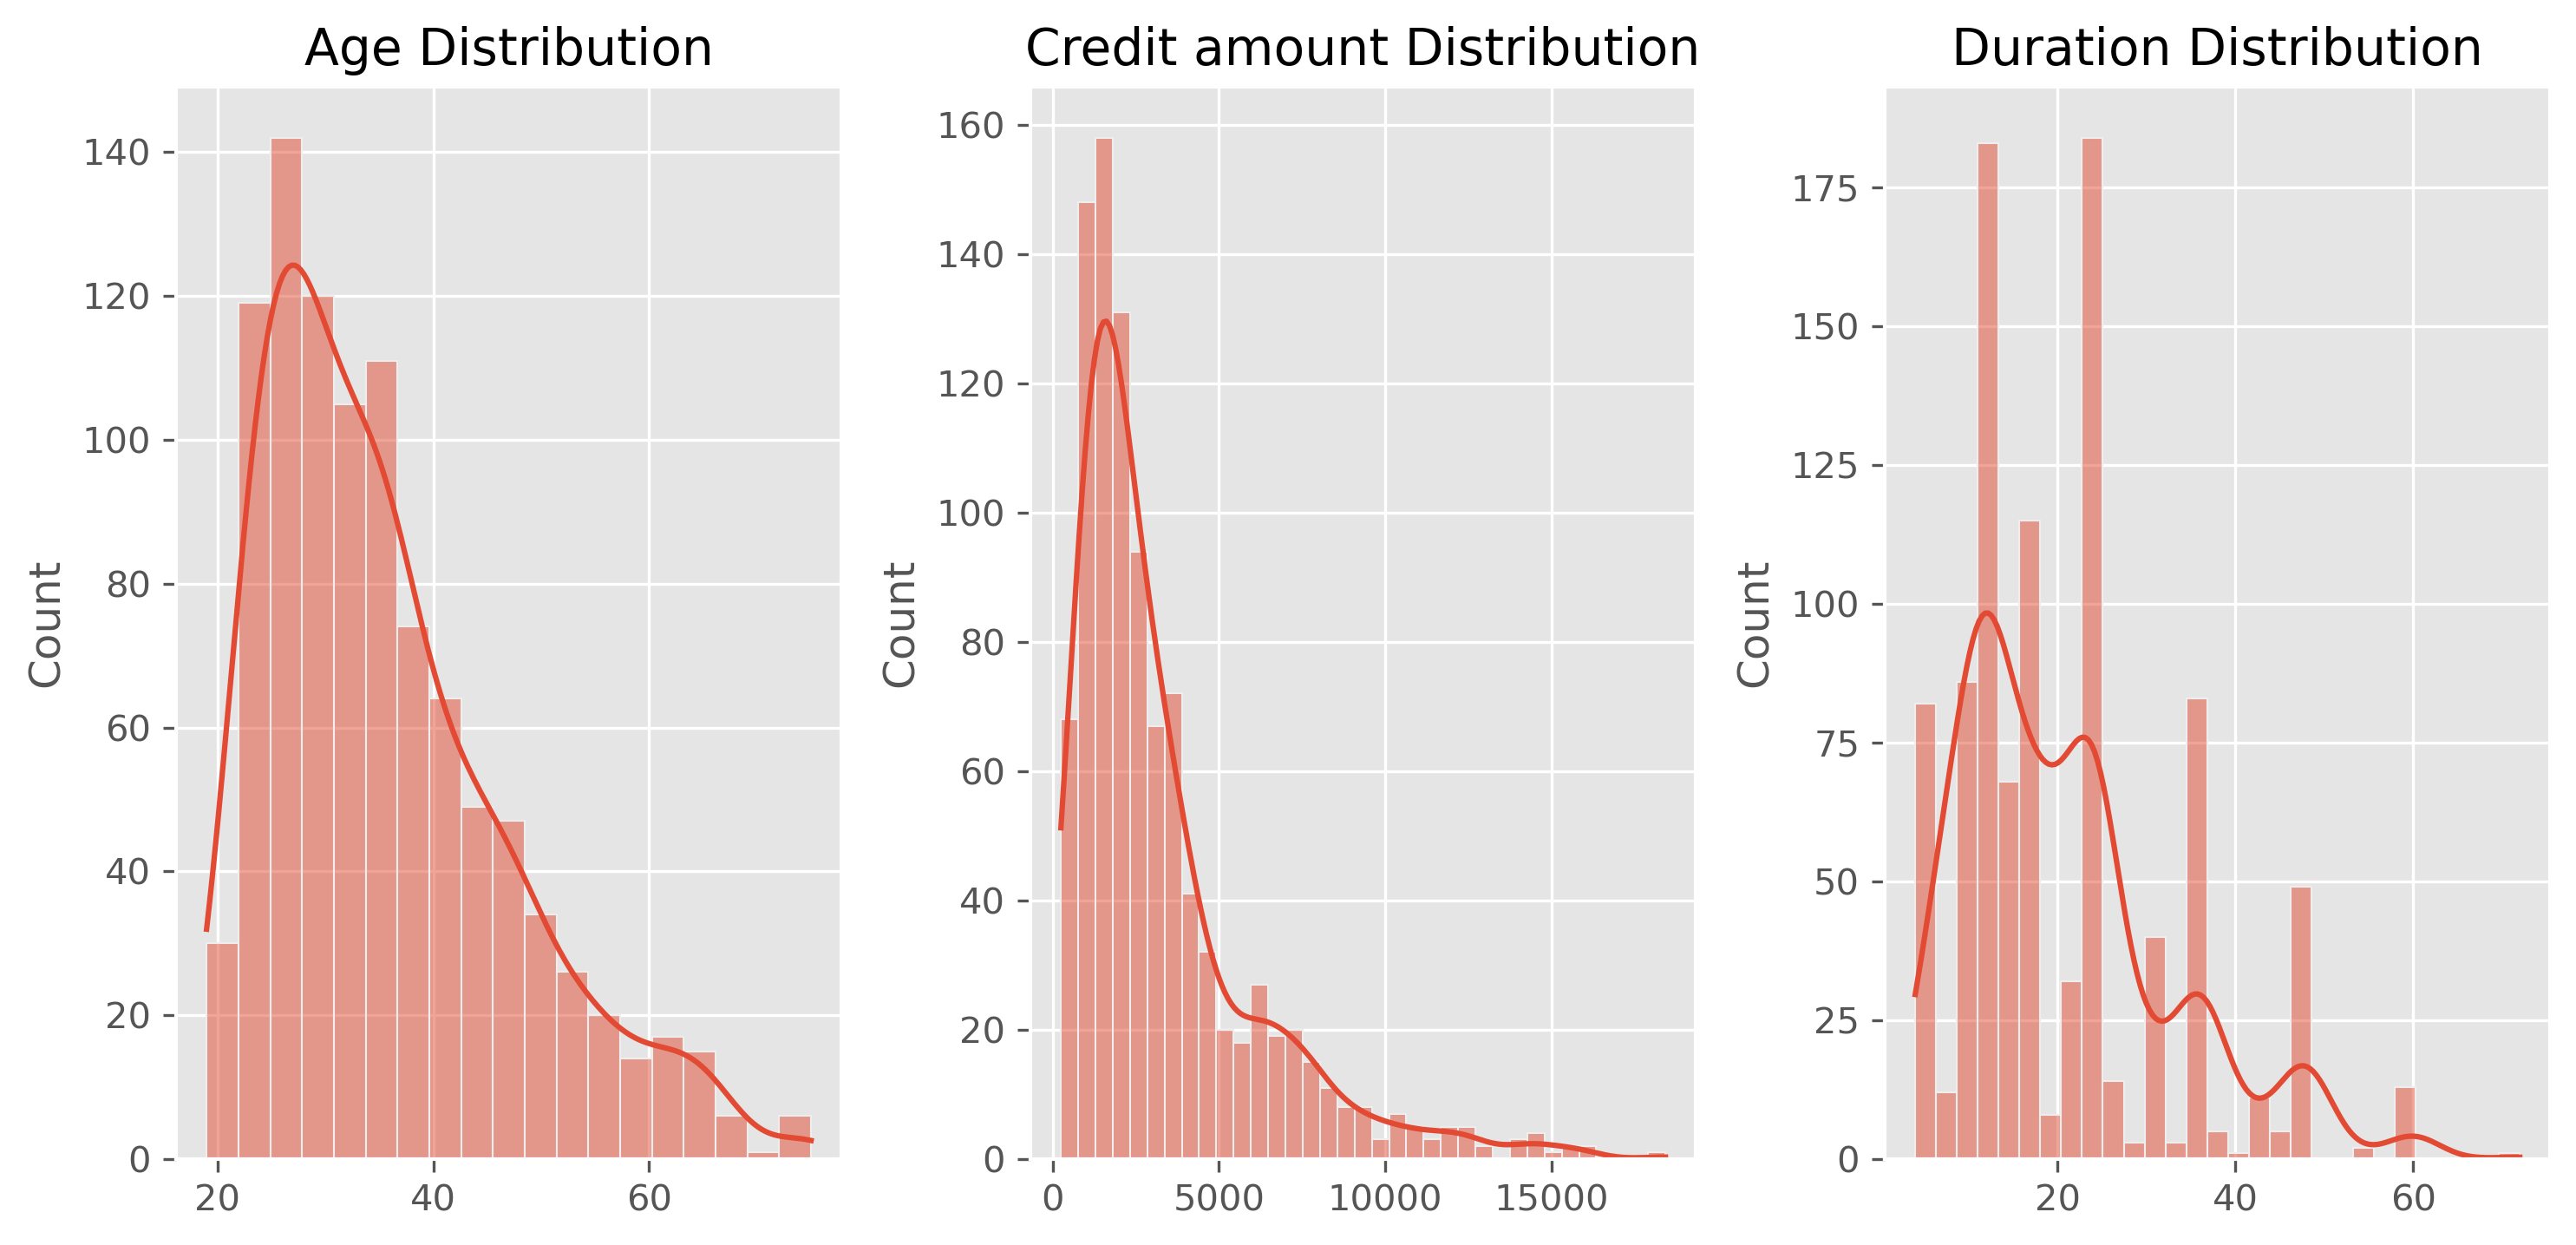

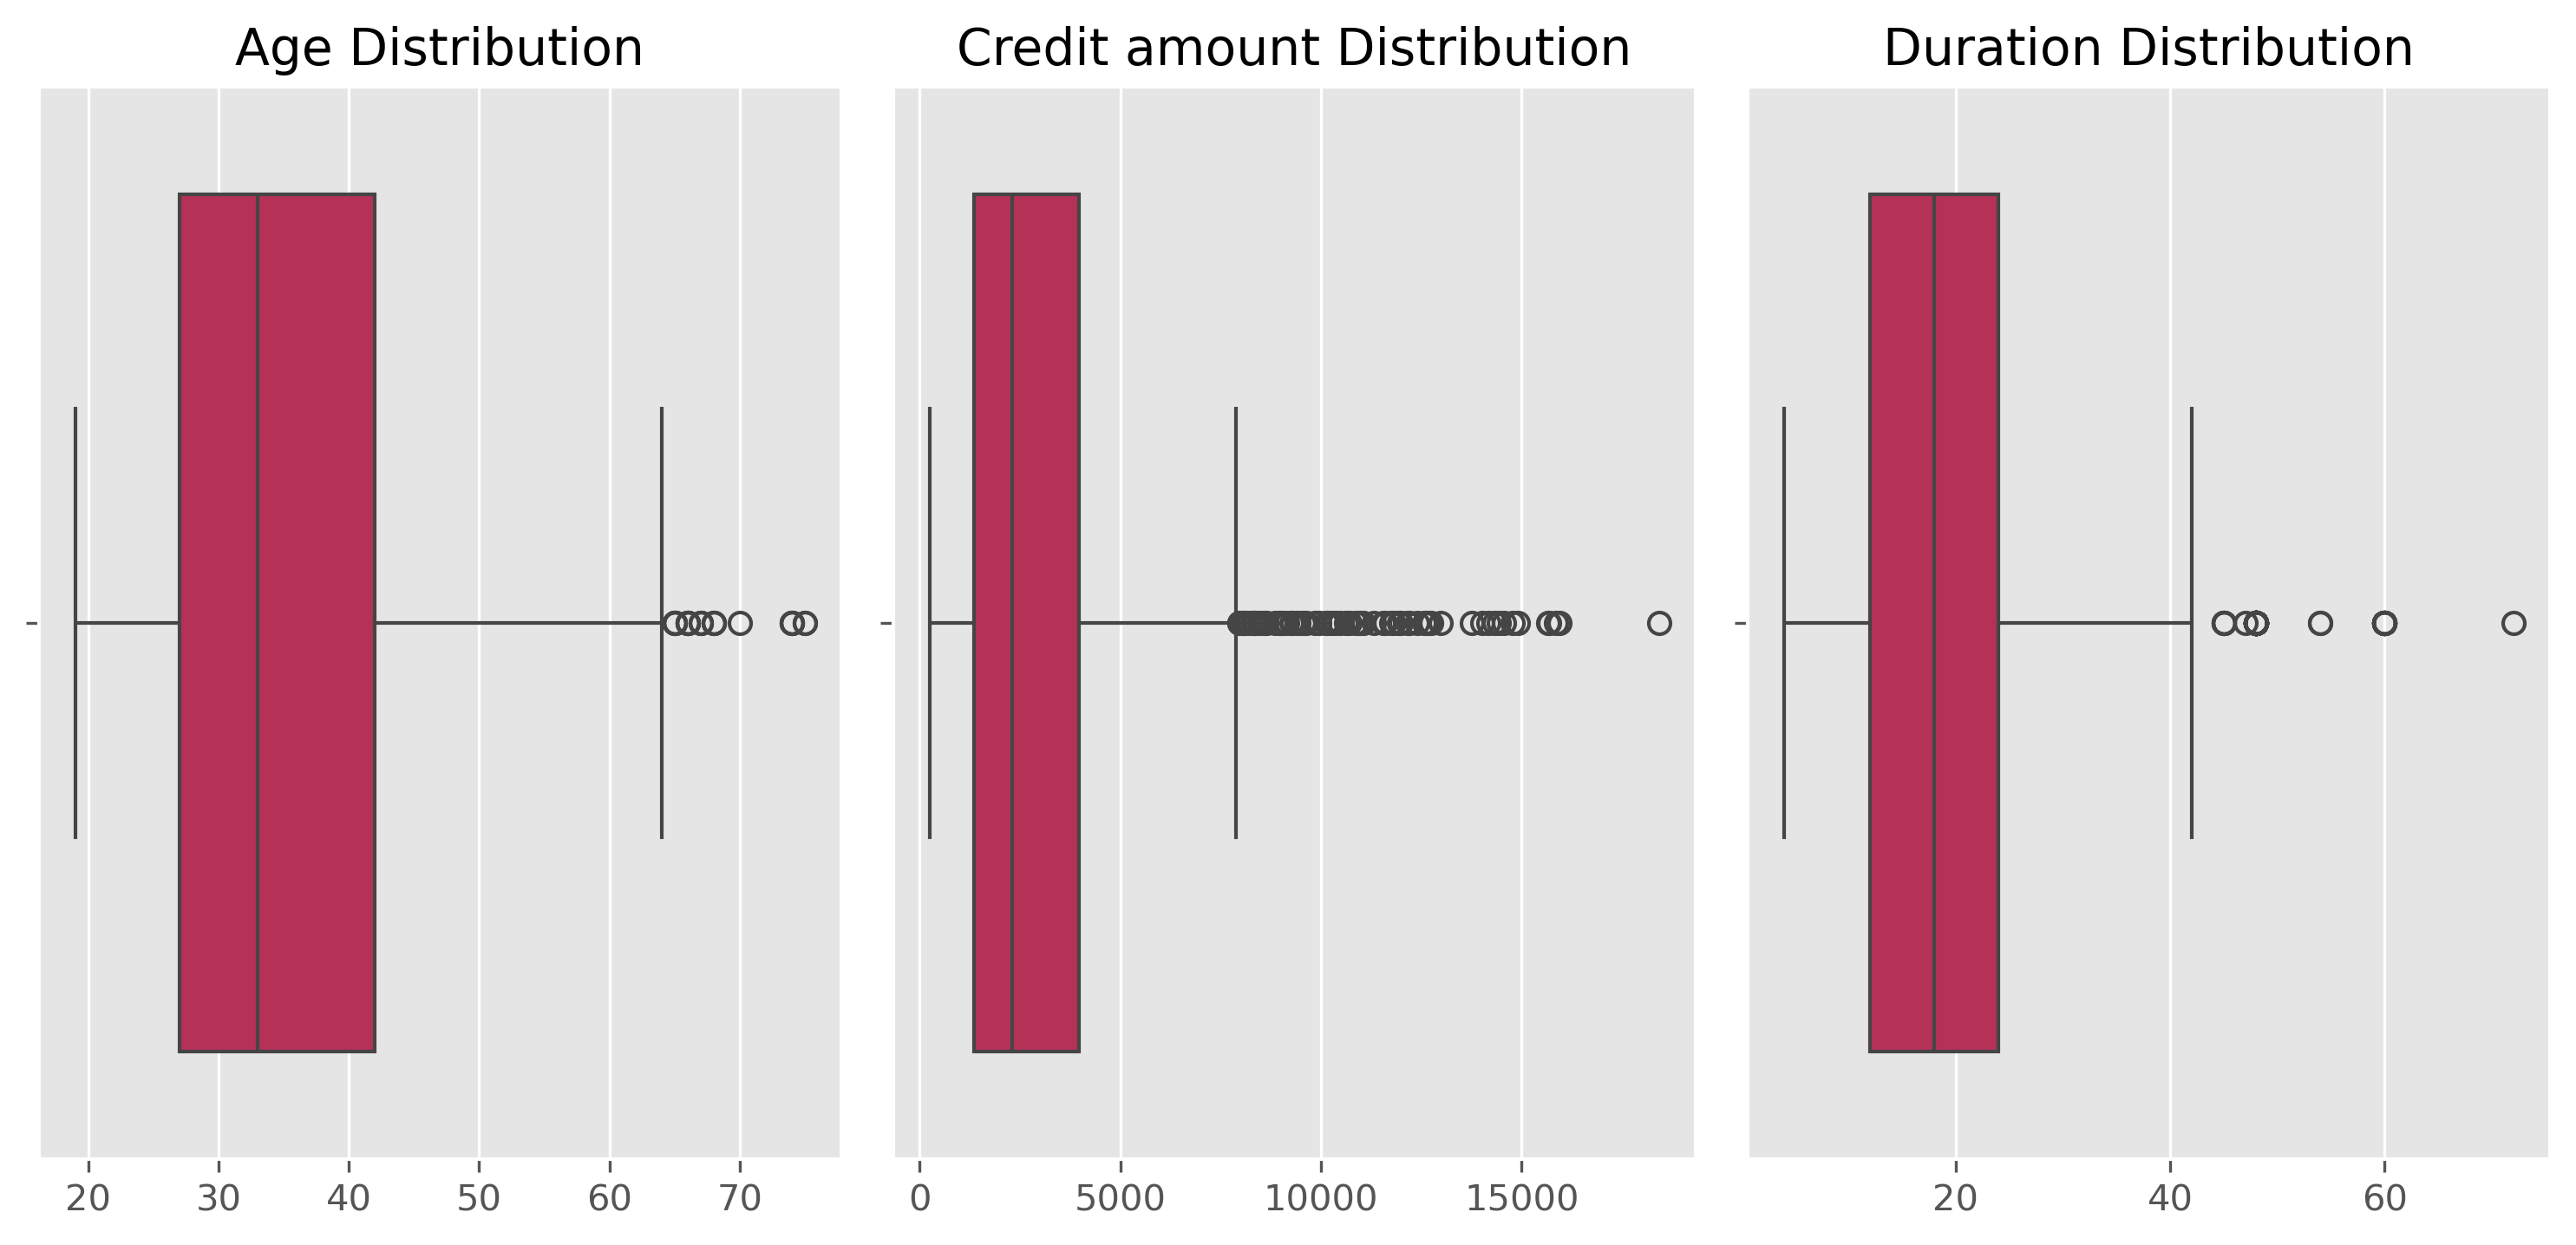

In [35]:
fig, ax = plt.subplots(1, 3, figsize = (10, 5), dpi=300)
ax = ax.flatten()
for idx,column in enumerate(num_features):
    sns.histplot(data=data, x=column, ax=ax[idx], palette='rocket', kde=True)
    ax[idx].set_title(f'{column} Distribution', size = 14)
    ax[idx].set_xlabel(None)
    plt.tight_layout()
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show();


fig, ax = plt.subplots(1, 3, figsize = (10, 5), dpi=300)
ax = ax.flatten()
for idx,column in enumerate(num_features):
    sns.boxplot(data=data, x=column, ax=ax[idx], palette='rocket')
    ax[idx].set_title(f'{column} Distribution', size = 14)
    ax[idx].set_xlabel(None)
    plt.tight_layout()
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show();

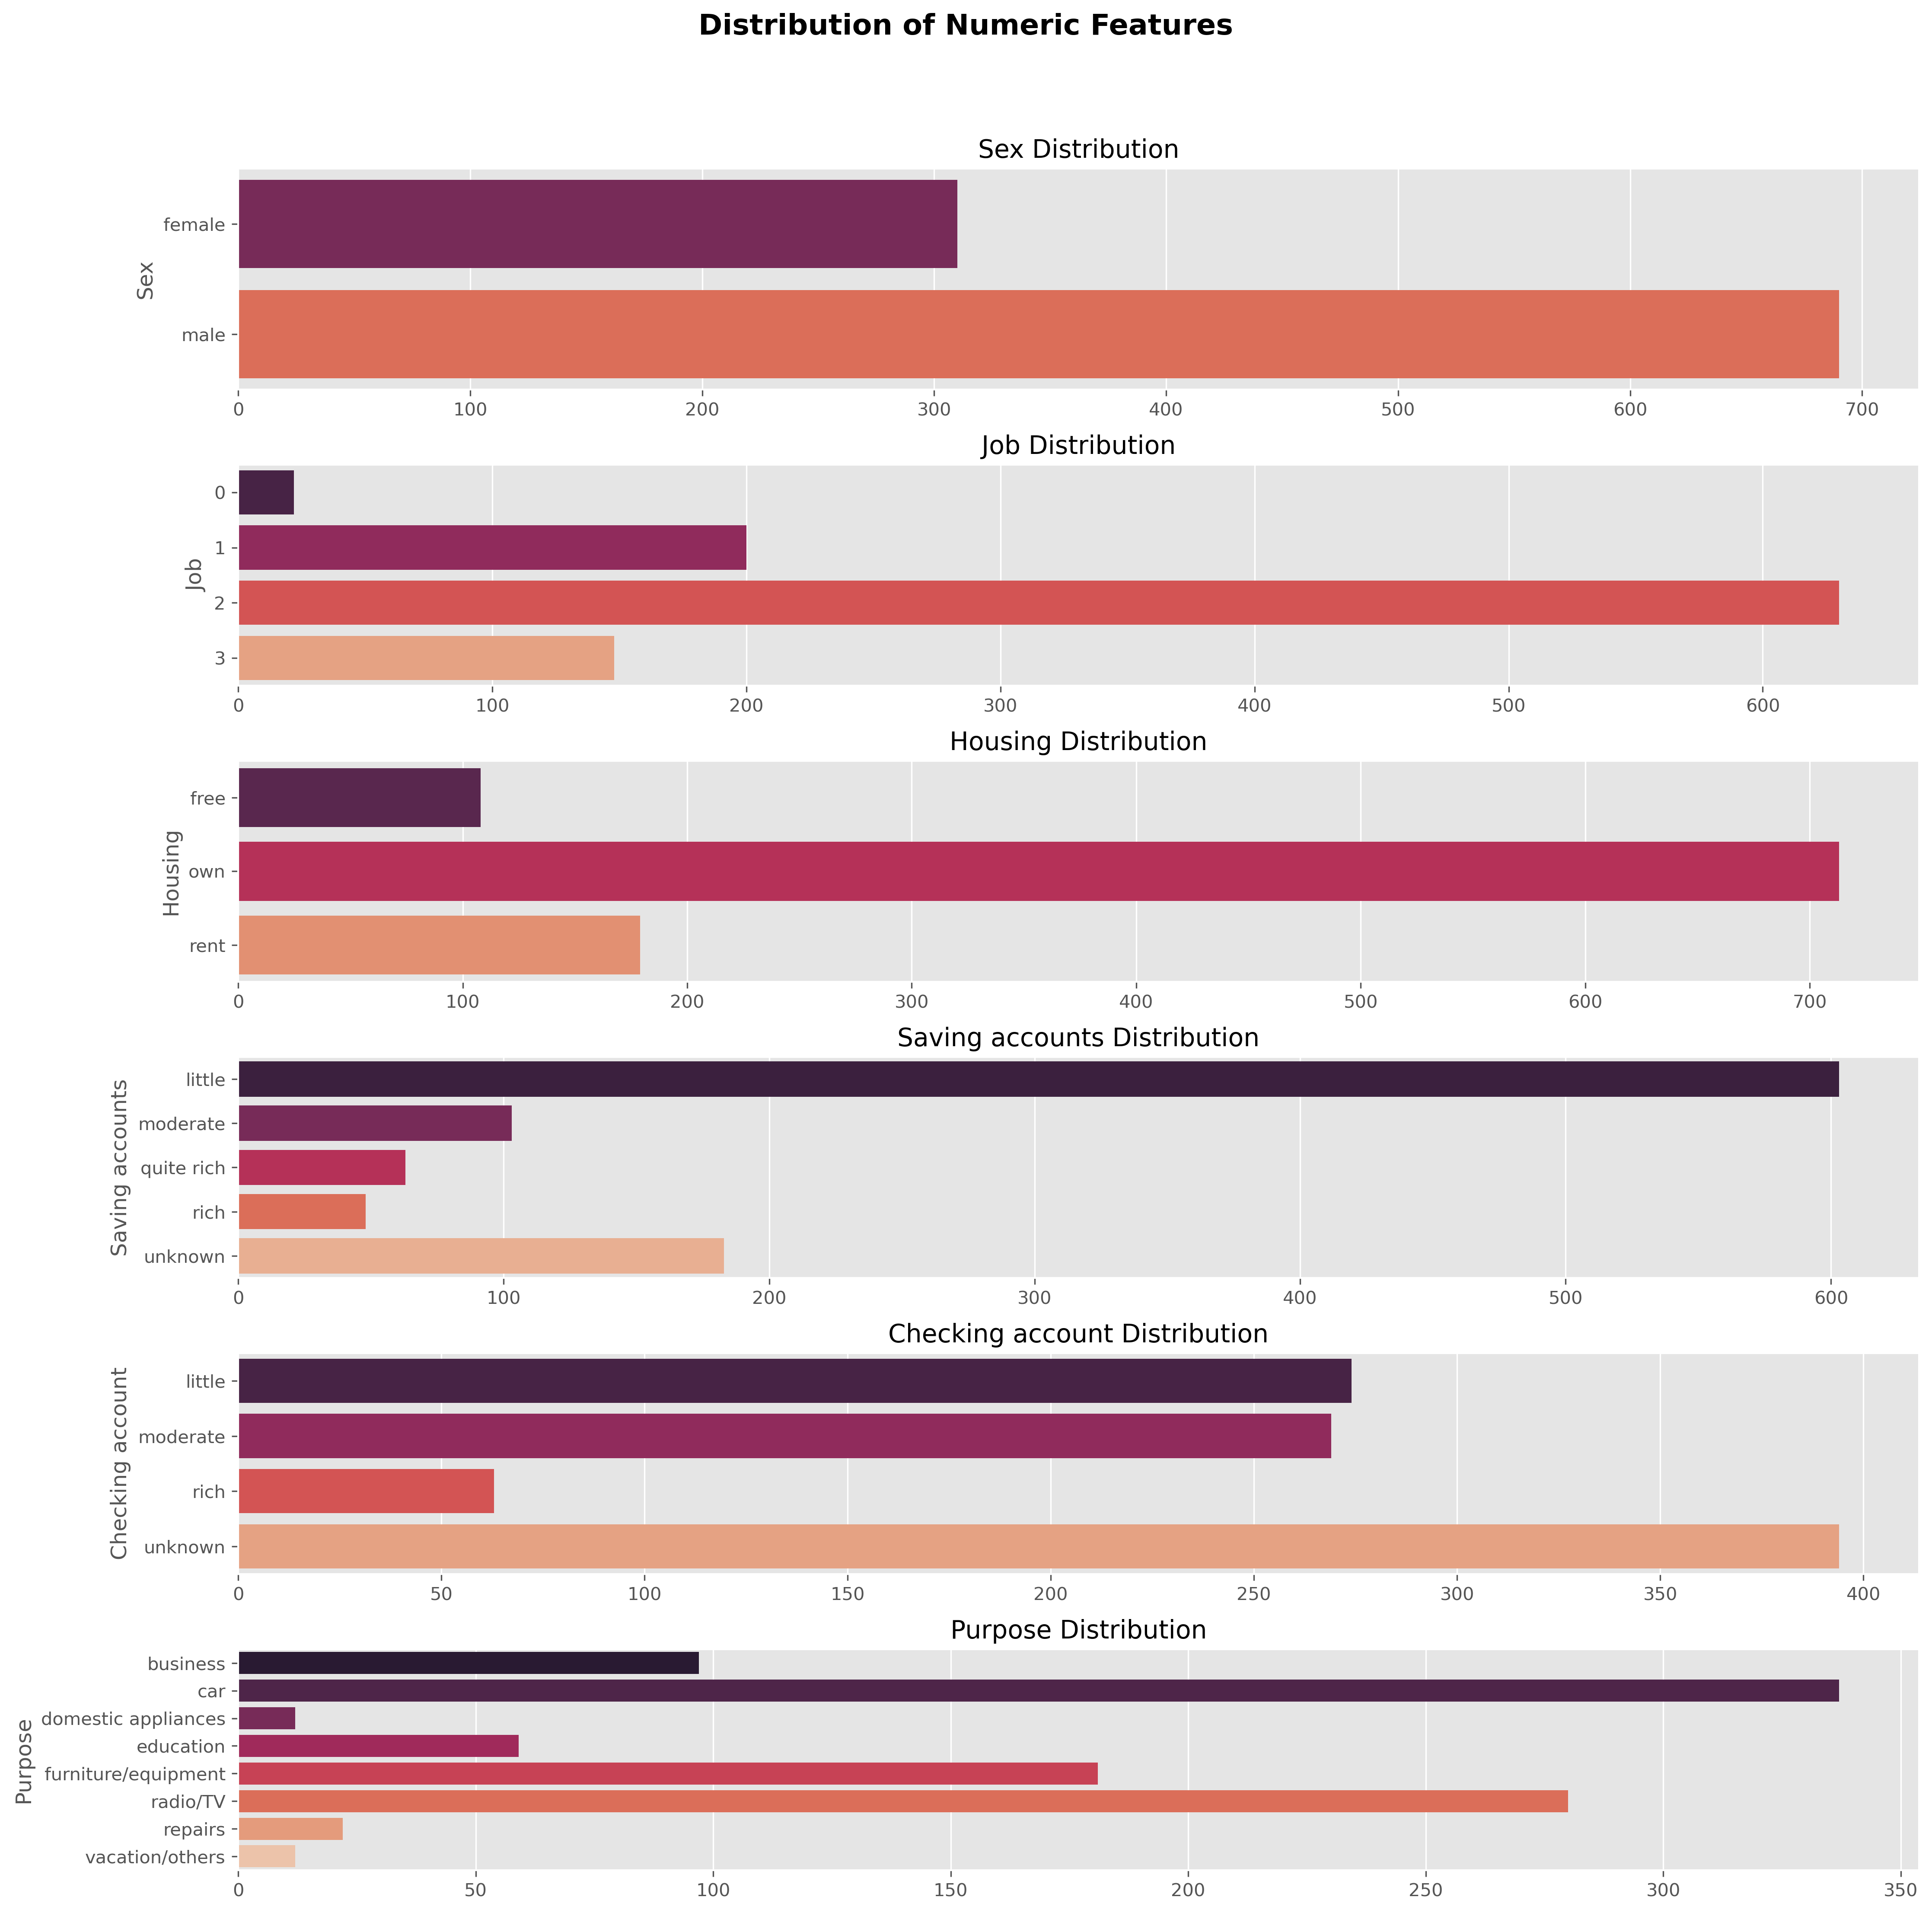

In [36]:
plt.style.use('ggplot')
fig, ax = plt.subplots(6, 1, figsize = (15, 15), dpi=300)
ax = ax.flatten()
# Exclude last value from cat features because this is our target and was already visualized above
for idx,column in enumerate(cat_features[:-1]):
    sns.countplot(data=data, y=column, ax=ax[idx], palette='rocket')
    ax[idx].set_title(f'{column} Distribution', size = 14)
    ax[idx].set_xlabel(None)
    plt.tight_layout()
fig.suptitle('Distribution of Numeric Features', fontsize = 16, fontweight = 'bold')
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show();

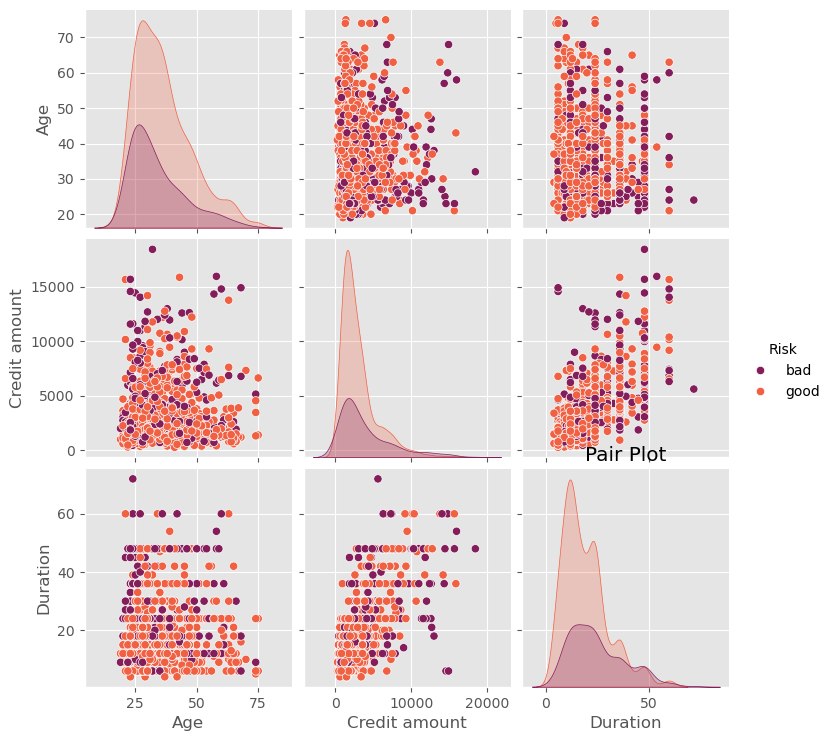

In [37]:
plt.style.use('ggplot')
sns.pairplot(data, hue='Risk', palette='rocket')
plt.title('Pair Plot')
plt.show();

- Je jünger, desto mehr Risiko
- Je höher der Kredit, desto höher das Risiko
- Je länger die Laufzeit des Kredits, desto höher das Risiko


Keine linearen Zusammenhänge zwischen gezeigten Features

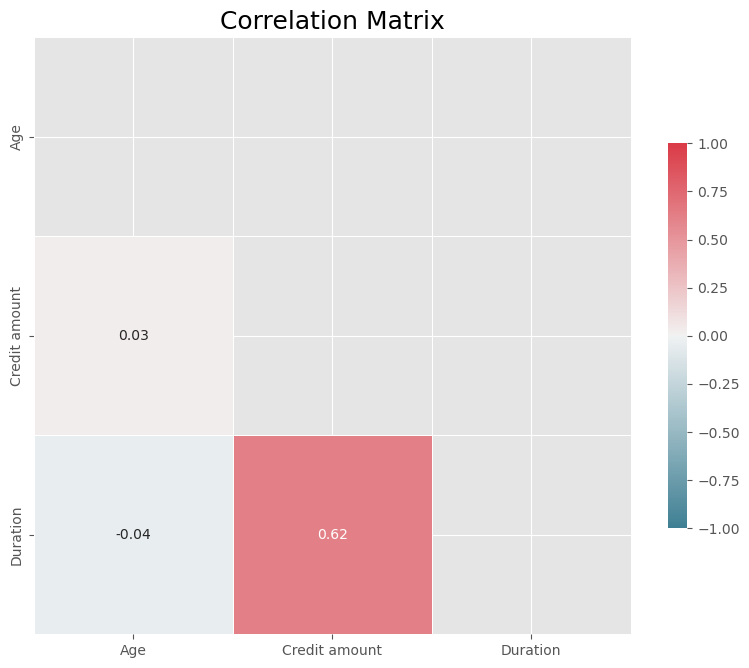

In [39]:
corr = data[num_features].corr().round(2)
mask = np.zeros_like(corr, dtype=np.bool_)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(8, 8))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
plt.title('Correlation Matrix', fontsize=18)
plt.tight_layout()

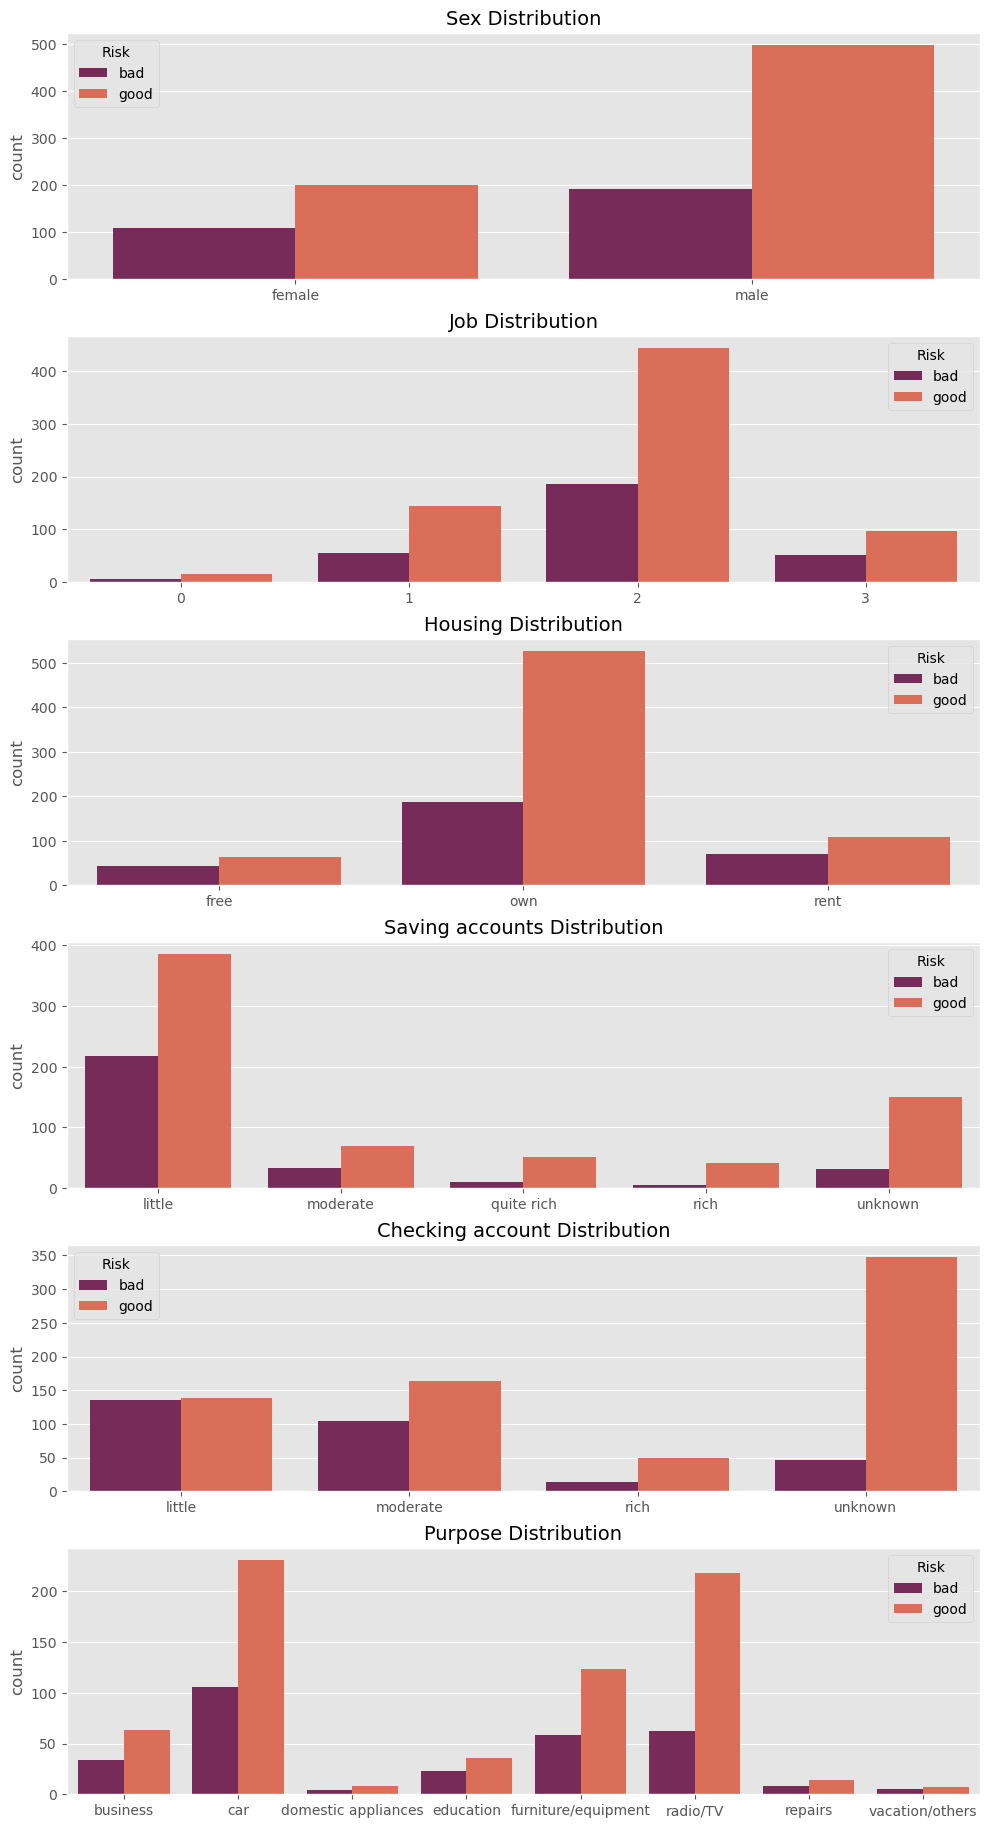

In [38]:
plt.style.use('ggplot')
fig, ax = plt.subplots(6, 1,figsize = (10, 20))
ax = ax.flatten()
for idx,column in enumerate(cat_features[:-1]):
    sns.countplot(data=data, x=column, ax=ax[idx], palette='rocket', hue='Risk')
    ax[idx].set_title(f'{column} Distribution', size = 14)
    ax[idx].set_xlabel(None)
    plt.tight_layout()
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show();

# Data preparation/Oversampling

In [56]:
data['Sex'].replace({'female': 1, 'male': 2}, inplace=True)
data['Housing'].replace({'own': 1, 'free': 2,'rent':3}, inplace=True)
data['Saving accounts'].replace({'little': 1, 'moderate':2,'quite rich':3,'rich':4,'unknown':0}, inplace=True)
data['Checking account'].replace({'little': 1, 'moderate':2,'rich':3,'unknown':0}, inplace=True)
data['Purpose'].replace({'business':1, 'car':2,'domestic appliances':3, 'education':4,'furniture/equipment':5,'radio/TV':6,'repairs':7,'vacation/others':8}, inplace=True)
data['Job'].replace({'1':1,'2':2,'3':3,'4':4},inplace=True)

data['Risk'].replace({'good': 0, 'bad': 1}, inplace=True)

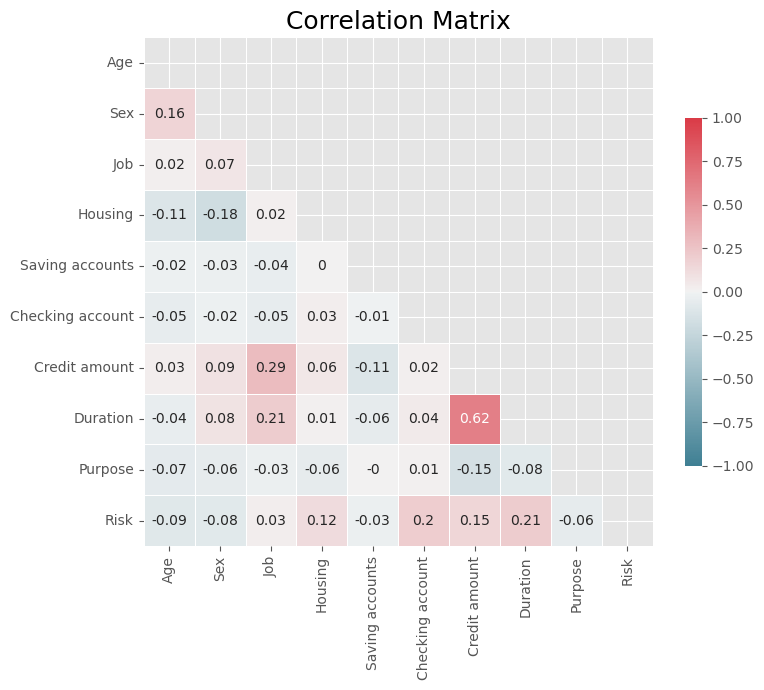

In [81]:
corr = data.corr().round(2)
mask = np.zeros_like(corr, dtype=np.bool_)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(8, 8))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
plt.title('Correlation Matrix', fontsize=18)
plt.tight_layout()

# Train and Test Data

In [33]:
X=data.drop(["defaulted"],axis=1)
Y=data["defaulted"]
# One hot encode the target (Not all models can work with categorical values)
#encoder = LabelEncoder().fit(Y)
#Y = encoder.transform(Y)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, stratify=Y, shuffle=True, test_size=0.3)

In [34]:
#Für das Oversampling verwenden wir SMOTE, eine weit verbreitete Technik bei Klassifizierungsproblemen, bei denen die Minderheitsklasse deutlich kleiner 
# ist als die Mehrheitsklasse. Bei diesem Verfahren wird ein Beispiel aus der Minderheitenklasse ausgewählt und seine k nächsten Nachbarn ermittelt.
# Anschließend werden neue synthetische Beispiele erstellt, indem die Attribute der ausgewählten Beispiele zufällig interpoliert und dem Datensatz hinzugefügt werden.
from collections import Counter
from imblearn.over_sampling import SMOTE
smote = SMOTE()
counter = Counter(Y_train)
print(counter)
X_resampled, Y_resampled = smote.fit_resample(X_train, Y_train)
counter = Counter(Y_resampled)
print(counter)


Counter({0.0: 3415, 1.0: 85})
Counter({0.0: 3415, 1.0: 3415})


# Decision Trees

In [35]:
from sklearn.tree import DecisionTreeClassifier
cart_model=DecisionTreeClassifier(criterion='gini',max_depth=4,min_samples_leaf=54,min_samples_split=2).fit(X_train,Y_train)
print("Train Accuracy Score : ",accuracy_score(Y_train,cart_model.predict(X_train)))
print("Test Accuracy Score : ",accuracy_score(Y_test,cart_model.predict(X_test)))
print(classification_report(Y_test,cart_model.predict(X_test)))

Train Accuracy Score :  0.9757142857142858
Test Accuracy Score :  0.9753333333333334
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      1463
         1.0       0.00      0.00      0.00        37

    accuracy                           0.98      1500
   macro avg       0.49      0.50      0.49      1500
weighted avg       0.95      0.98      0.96      1500



In [36]:
cart_model_resample=DecisionTreeClassifier(criterion='gini',max_depth=4,min_samples_leaf=54,min_samples_split=2).fit(X_resampled,Y_resampled)
print("Train Accuracy Score : ",accuracy_score(Y_resampled,cart_model.predict(X_resampled)))
print("Test Accuracy Score : ",accuracy_score(Y_test,cart_model.predict(X_test)))
print(classification_report(Y_test,cart_model.predict(X_test)))

Train Accuracy Score :  0.5
Test Accuracy Score :  0.9753333333333334
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      1463
         1.0       0.00      0.00      0.00        37

    accuracy                           0.98      1500
   macro avg       0.49      0.50      0.49      1500
weighted avg       0.95      0.98      0.96      1500

